In [10]:
import pandas as pd
import numpy as np

In [6]:
df3=pd.read_csv('coustumer_data_for_ml_2.csv')

In [7]:
df3['label'] = df3['no_transaction'].apply(lambda x: 1 if x >0 else 0)

In [8]:
df3

,visitorid,no_views,no_addtocart,no_transaction,time_spent_minutes,label
0,17,1,0,0,0.0000,0
1,52,1,0,0,0.0000,0
2,137,1,0,0,0.0000,0
3,202,1,0,0,0.0000,0
4,337,1,0,0,0.0000,0
...,...,...,...,...,...,...
995,155379,1,0,0,0.0000,0
996,155417,3,0,0,0.3908,0
997,155590,5,0,0,8.5418,0
998,155844,1,0,0,0.0000,0


In [13]:
x=np.array([df3['no_views'],df3['time_spent_minutes'],df3['no_addtocart']]).T

In [14]:
y=np.array(df3['label'])

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(x_train, y_train)



GradientBoostingRegressor()

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


y_pred = model.predict(x_test)


y_pred = np.clip(y_pred, 0, 100)


print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
from sklearn.metrics import accuracy_score



Mean Absolute Error (MAE): 0.004994994707481306
Mean Squared Error (MSE): 0.004845441166983387
R^2 Score: 0.026041976485751572


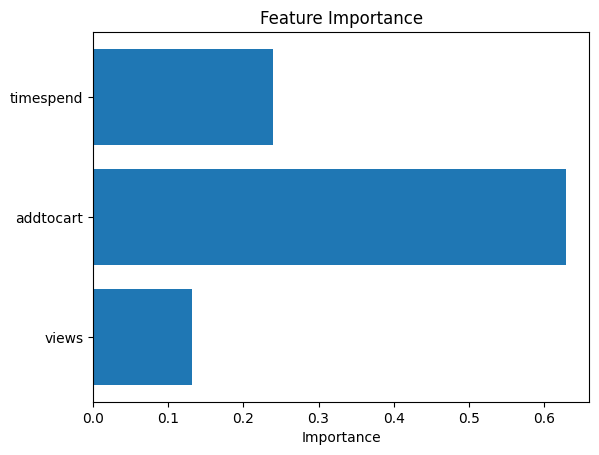

In [20]:
import matplotlib.pyplot as plt

feature_importance = model.feature_importances_
features =['views','addtocart','timespend']

plt.barh(features, feature_importance)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


In [21]:
a=[[2,50,20],]

In [22]:
model.predict(a)

array([0.01248808])

In [23]:
import joblib

In [24]:
joblib.dump(model, 'model.pkl')


['model.pkl']